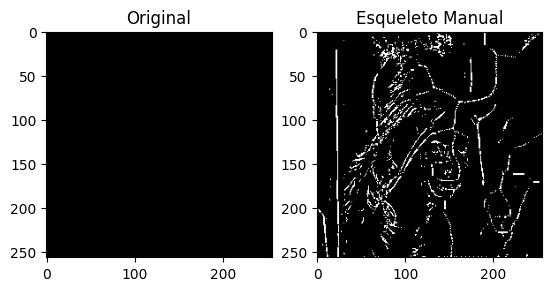

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Carga la imagen
ruta_imagen = "C:/Users/luisl/OneDrive/Escritorio/PDI/Estancia Investigacion/Recursos/lenna.jpg"
imagen = cv2.imread(ruta_imagen, cv2.IMREAD_GRAYSCALE)

# Binarizar la imagen (convertir a blanco y negro)
_, imagen_binaria = cv2.threshold(imagen, 127, 255, cv2.THRESH_BINARY)

def esqueletizacion_manual(image):
    # Inicializar matrices para almacenar resultados intermedios
    esqueleto = np.zeros(image.shape, np.uint8)  # Esqueleto resultante
    erosionada = np.zeros(image.shape, np.uint8)    # Imagen erosionada
    temp = np.zeros(image.shape, np.uint8)      # Almacenamiento temporal

    # Iterar hasta que la imagen se vuelva completamente negra
    while True:
        # Erosión de la imagen original
        cv2.erode(image, cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3)), erosionada)
        # Dilatación de la imagen erosionada
        cv2.dilate(erosionada, cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3)), temp)
        # Calcular la diferencia entre la imagen original y la imagen dilatada
        cv2.subtract(image, temp, temp)
        # Unir la diferencia con el esqueleto actual
        cv2.bitwise_or(esqueleto, temp, esqueleto)
        # Actualizar la imagen original con la imagen erosionada para la siguiente iteración
        image[:,:] = erosionada[:,:]
        # Verificar si la imagen original se ha vuelto completamente negra
        if cv2.countNonZero(image) == 0:
            break

    # Devolver el resultado final del esqueleto
    return esqueleto


# Aplicar la función esqueletizar_manual
esqueleto_manual = esqueletizacion_manual(imagen_binaria)

# Resultados
plt.subplot(1, 2, 1)
plt.imshow(imagen_binaria, cmap='gray')
plt.title('Original')
plt.subplot(1, 2, 2)
plt.imshow(esqueleto_manual, cmap='gray')
plt.title('Esqueleto Manual')
plt.show()
